In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
%matplotlib widget

import importlib
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [60]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [61]:
import ast
import re

def fix_number_format(value):
    if isinstance(value, str):
        # Add a comma after an integer followed by a float
        value = re.sub(r'(\d+)\.\s+(\d)', r'\1., \2', value)
        
        # Add commas between numbers wherever necessary
        value = re.sub(r'(?<=\d)\s+(?=[\d\.])', ', ', value)
    return value

def convert_to_list(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except Exception as e:
            print(f"Error converting value: {value}, error: {e}")
            return value
    return value

# Apply this function to the relevant columns
columns_to_convert = ['F_max', 'F_stat', 'phi_stat', 'NPQ', 'ETR']


In [62]:

names = ["20241014_activation_Pt2", "20241015_activation_KO6", "20241021_activation_LtpM", "20241029_activation_Pt1-1", "20241030_activation_Pt1-1-redo", "20241029_activation_Pt1-3", "20241029_activation_Pt1-4", "20241029_activation_Pt1-6","20241029_activation_Pt1-15", "20241030_activation_Pt1-11",
         "20241029_activation_Pt1-16", "20241030_activation_Pt1-17", "20241030_activation_Pt1-20", "20241030_activation_Pt1-26", 
         "20241030_activation_Pt1-27", "20241030_activation_Pt1-43", "20241107_activation_Pt1-5", "20241107_activation_Pt1-7", "20241107_activation_Pt1-8", "20241107_activation_Pt1-9"]

conditions = ["Pt2 (WT)", "Pt2 - KO6", "Pt2 - LtpM", "Pt1-1 (WT)", "Pt1-1-redo (WT)", "Pt1-3 (VDE KO)", "Pt1-4 (VDE c4)", "Pt1-6 (VDE c6)", "Pt1-15 (VDE c16)", "Pt1-11 (VDE - c11)",
              "Pt1-16 (ZEP3 KO)", "Pt1-17 (ZEP3 - c1)", "Pt1-20 (ZEP3 - c7)", "Pt1-26 (ZEP3 - c13)",
              "Pt1-27 (ZEP3 - c14)", "Pt1-43 (ZEP - c41)", "Pt1 - 5 (VDE c5)", "Pt1 - 7 (VDE c7)", "Pt1 - 8 (VDE c8)", "Pt1 - 9 (VDE c9)"]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
    df = pd.read_csv(path, index_col= False, sep=";")
    for col in columns_to_convert:
        df[col] = df[col].apply(fix_number_format)
        df[col] = df[col].apply(convert_to_list)
    results.append(df)

fig_folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20241029_activation_Pt1-4/compare"
    
times_Fmax = [20, 80, 140, 200]

offset_Ek = 3.13
amp_EK = 1.5



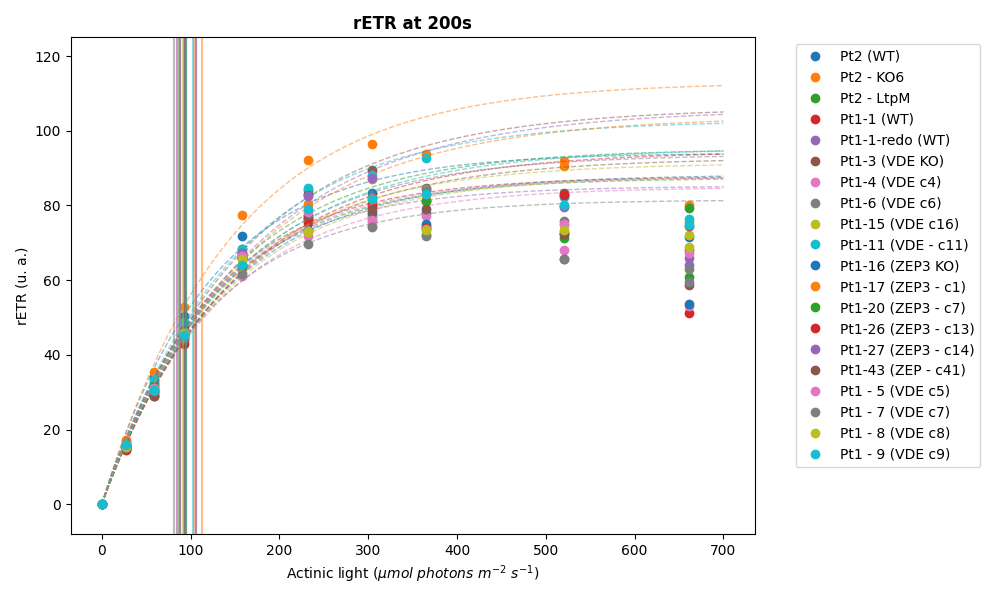

In [63]:

time = 200

Ek = []


fig, ax = plt.subplots(figsize = (10, 6))
conditions_to_compare = conditions
ax.set_ylim(-8, 125)
for condition in conditions_to_compare:
    i = conditions.index(condition)
    ETR_matrix = np.asarray(results[i].ETR.tolist())
    ETR = ETR_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, ETR, 'o', label = condition, linewidth = 1, color = f"C{i}")
    popt, pcov, xfit, yfit = tools.Ek_fit(light[0:7], ETR[0:7], 0, 700, 100, p0 = [100, 100])
    Ek.append(popt[0])
    ax.plot(xfit, yfit, '--', linewidth = 1, color = f"C{i}", alpha = 0.5)    
    ylim = ax.get_ylim()
    ax.axvline(x=Ek[-1], linewidth=1.5, color = f"C{i}", alpha = 0.5)

leg = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("rETR (u. a.)")
ax.set_ylim(-8, 125)
ax.set_title(f"rETR at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

# fig.savefig(f"{fig_folder}/ETR_{time}s.png", dpi=300)

In [64]:
np.array(Ek) * 2.5

array([235.14376984, 282.5332186 , 218.40870491, 219.31631972,
       212.99409809, 265.52548107, 212.35164636, 234.22860688,
       219.92329085, 256.98571103, 220.64560193, 259.77799052,
       237.8953853 , 236.3988254 , 264.52065282, 231.7749583 ,
       219.04821618, 203.79518949, 228.39699622, 238.19871883])

AttributeError: 'DataFrame' object has no attribute 'NPQ'

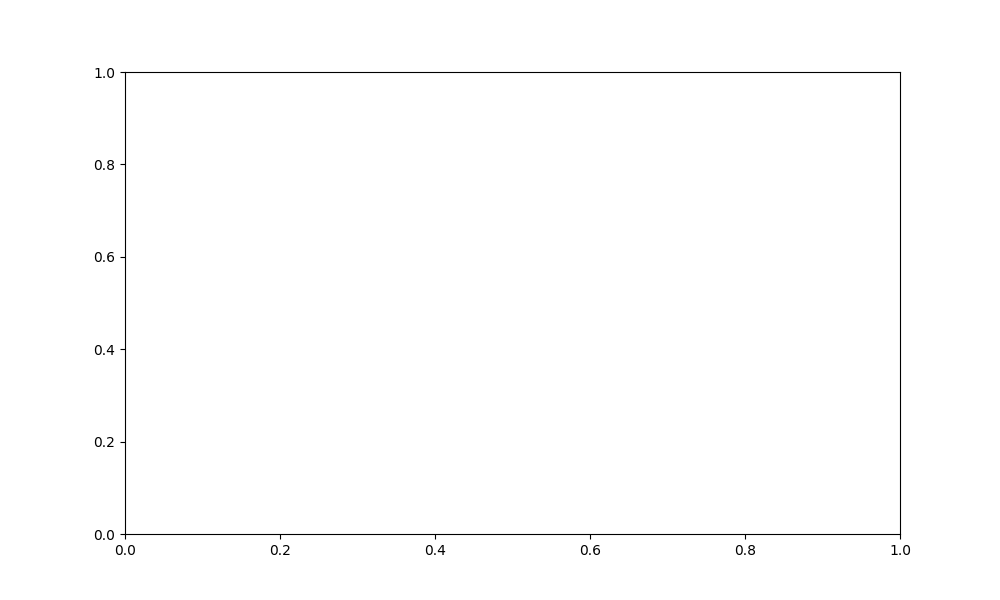

In [67]:
time = 200
fig, ax = plt.subplots(figsize = (10, 6))

E50NPQ = []

# ax.set_ylim(-0.2, 4.5)

conditions_to_compare = conditions

for condition in conditions_to_compare:
    i = conditions.index(condition)
    NPQ_matrix = np.asarray(results[i].NPQ.tolist())
    NPQ = NPQ_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, NPQ, 'o', label = condition, color = f"C{i}")
    if condition != "Pt1-3 (VDE KO)":
        popt, pcov, xfit, yfit = tools.sigmoid_fit(light, NPQ, 0, 700, 100, p0 =  [1, 0.02, 300, 0])
        E50NPQ.append(popt[2])
        ax.plot(xfit, yfit, '--', linewidth = 1, color = f"C{i}", alpha = 0.5)
        ax.axvline(x=popt[2], linewidth=1.5, color = f"C{i}", alpha = 0.5)
    else:
        E50NPQ.append(0)
    ylim = ax.get_ylim()

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("NPQ (u. a.)")

ax.set_title(f"NPQ at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()


# fig.savefig(f"{fig_folder}/NPQ_{time}s_all.png", dpi=300)

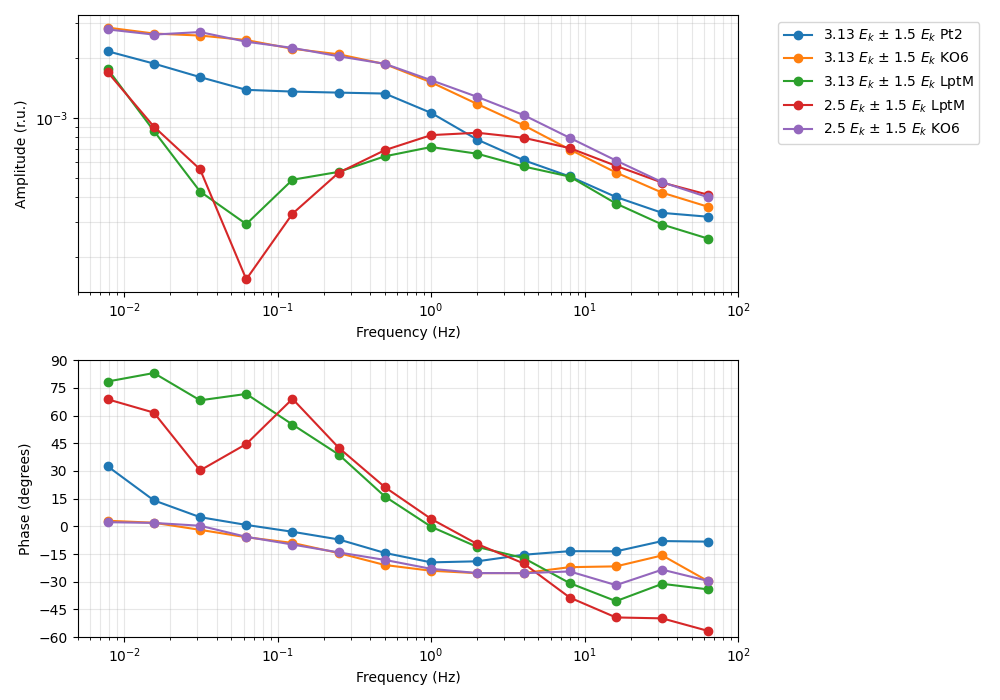

In [ ]:
names = ["20241014_bode_Pt2", "20241015_bode_KO6", "20241021_bode_LtpM", "20241028_bode_LtpM_2.5Ek", "20241028_bode_Pt2x1KO6_2.5Ek"]
norm_Fmax = [0.2133, 0.3592, 0.3515, 0.397, 0.374]
A_input = [34.6, 38.9, 30.8, 37, 47.9]

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]
results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))


fig, ax = plt.subplots(2, 1, figsize = (10, 7))
labels = ["3.13 $E_k$ ± 1.5 $E_k$ Pt2", "3.13 $E_k$ ± 1.5 $E_k$ KO6", "3.13 $E_k$ ± 1.5 $E_k$ LptM", "2.5 $E_k$ ± 1.5 $E_k$ LptM", "2.5 $E_k$ ± 1.5 $E_k$ KO6"]

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])


    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].grid(which ="both", alpha = 0.3)
ax[1].grid(which = "both", alpha = 0.3)




ax[1].set_ylim(-60, 15)
ax[1].set_yticks(np.arange(-60, 90 + 15, 15))

# ax[0] = tools.bode_plot_axes(ax[0])
# ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
# ax[0].legend()

fig.tight_layout()

fig.savefig(f"C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20241021_bode_LtpM" + "/bode_plot_compare.png", dpi = 500)


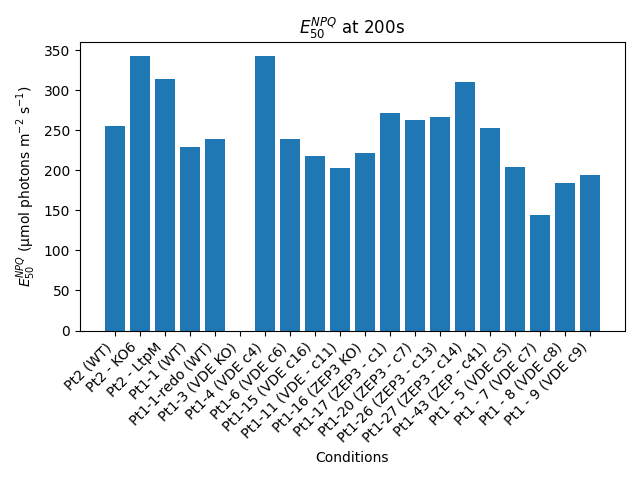

In [ ]:
fig, ax = plt.subplots()

ax.bar(conditions_to_compare, E50NPQ)

# Set labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('$E_{50}^{NPQ}$ (µmol photons m$^{-2}$ s$^{-1}$)')
ax.set_title('$E_{50}^{NPQ}$ at 200s')


# Rotate x-tick labels if needed
plt.xticks(rotation=45, ha='right')
fig.tight_layout()

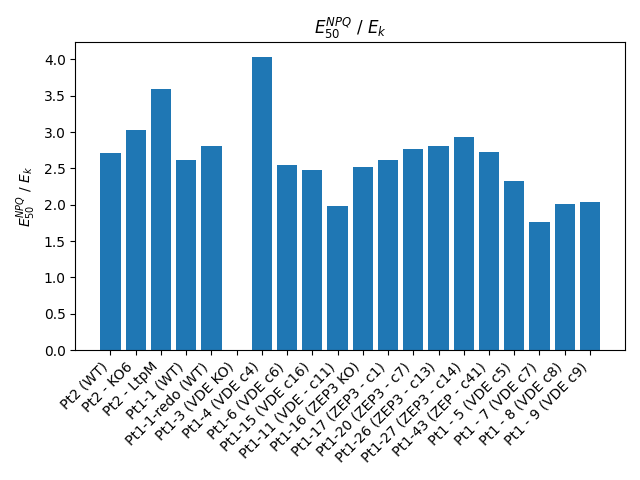

In [ ]:
fig, ax = plt.subplots()

ax.bar(conditions_to_compare, np.array(E50NPQ)/np.array(Ek))

# Set labels and title
ax.set_ylabel('$E_{50}^{NPQ}$ / $E_k$')
ax.set_title('$E_{50}^{NPQ}$ / $E_k$')


# Rotate x-tick labels if needed
plt.xticks(rotation=45, ha='right')
fig.tight_layout()

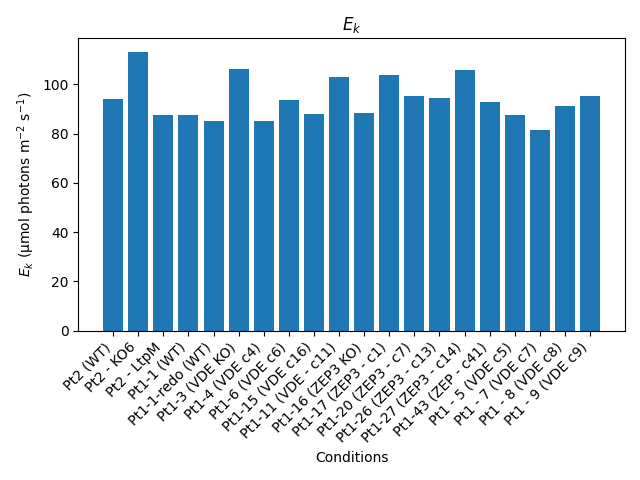

In [ ]:
fig, ax = plt.subplots()

ax.bar(conditions_to_compare, Ek)

# Set labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('$E_k$ (µmol photons m$^{-2}$ s$^{-1}$)')
ax.set_title('$E_k$')


# Rotate x-tick labels if needed
plt.xticks(rotation=45, ha='right')
fig.tight_layout()

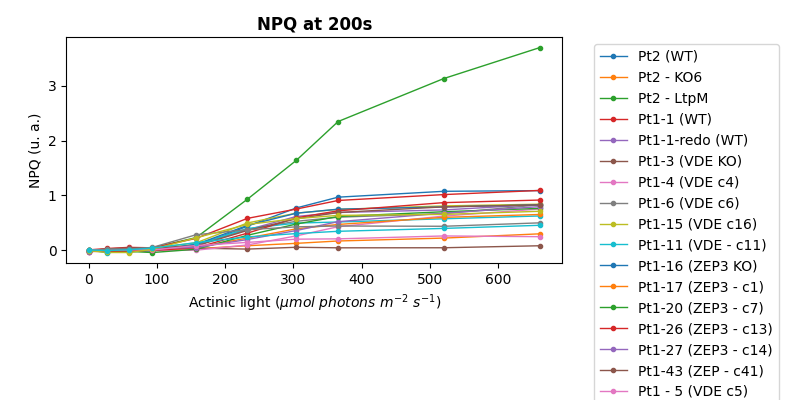

In [ ]:
time = 200
fig, ax = plt.subplots(figsize = (8, 4))

# ax.set_ylim(-0.2, 4.5)



for condition in conditions_to_compare:
    i = conditions.index(condition)
    NPQ_matrix = np.asarray(results[i].NPQ.tolist())
    NPQ = NPQ_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, NPQ, 'o-', label = condition, color = f"C{i}", markersize = 3, linewidth = 1)


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("NPQ (u. a.)")

ax.set_title(f"NPQ at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/NPQ_{time}s_all.png", dpi=300)

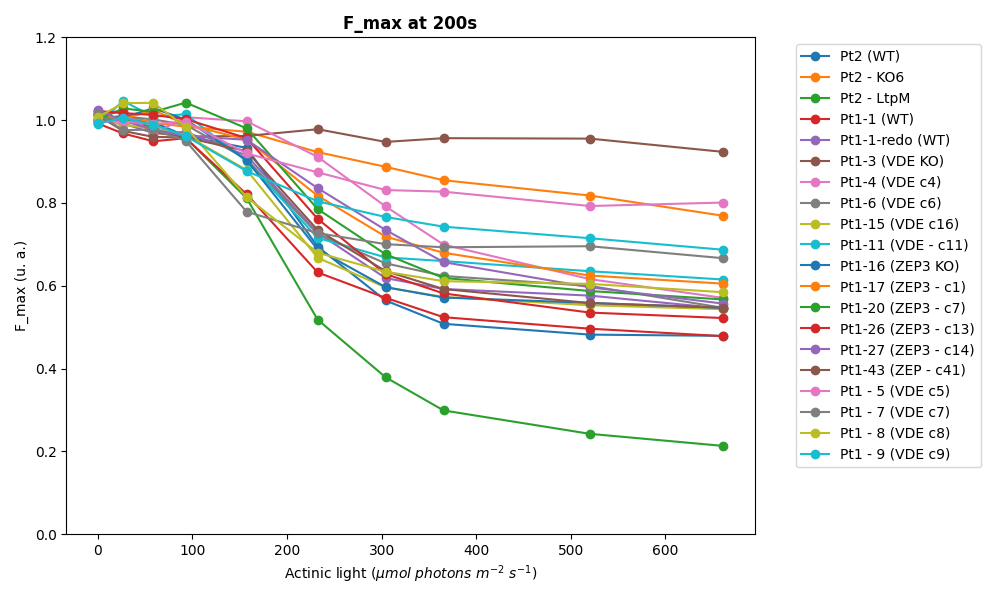

In [ ]:
time = 200
fig, ax = plt.subplots(figsize = (10, 6))

ax.set_ylim(0, 1.2)

for condition in conditions_to_compare:
    i = conditions.index(condition)
    F_max_matrix = np.asarray(results[i].F_max.tolist())
    F_max = F_max_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, F_max, 'o-', label = condition, color = f"C{i}")
    ylim = ax.get_ylim()
    # ax.annotate('', xy=(offset_Ek*Ek[i] - amp_EK*Ek[i], ylim[1] - 0.05*ylim[1]*(i+1)), xytext=(offset_Ek*Ek[i] + amp_EK*Ek[i], ylim[1]- 0.05*ylim[1]*(i+1)),
    #         arrowprops=dict(arrowstyle='<->', color=f"C{i}", alpha = 0.5))  

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("F_max (u. a.)")
ax.set_title(f"F_max at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/F_max_{time}s_all.png", dpi=300)

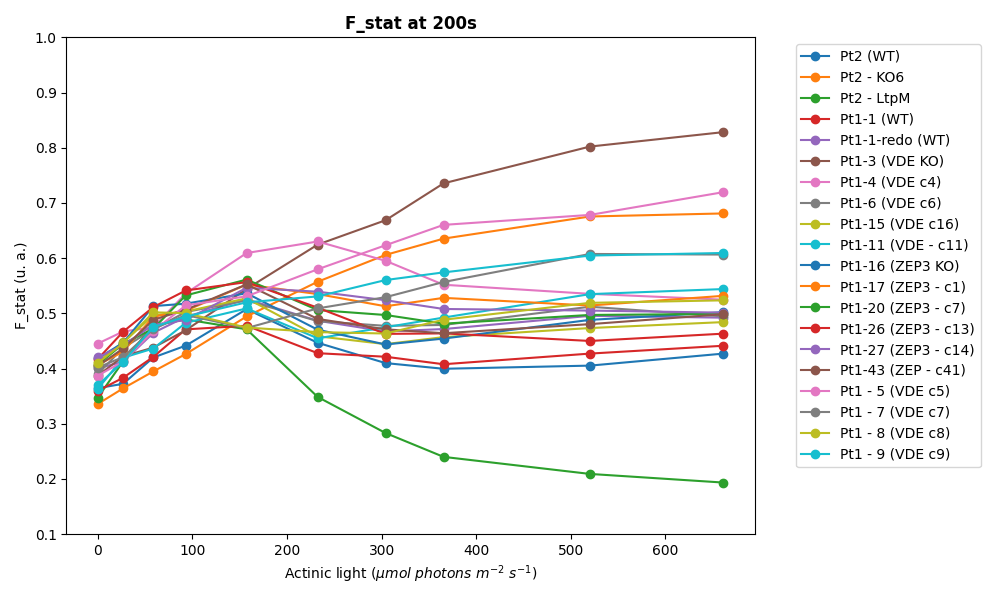

In [ ]:
time = 200
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_ylim(0.1, 1)
for condition in conditions:
    i = conditions.index(condition)
    F_stat_matrix = np.asarray(results[i].F_stat.tolist())
    F_stat = F_stat_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, F_stat, 'o-', label = condition, color = f"C{i}")
    ylim = ax.get_ylim()
    # ax.annotate('', xy=(offset_Ek*Ek[i] - amp_EK*Ek[i], ylim[1] - 0.05*ylim[1]*(i+1)), xytext=(offset_Ek*Ek[i] + amp_EK*Ek[i], ylim[1]- 0.05*ylim[1]*(i+1)),
    #         arrowprops=dict(arrowstyle='<->', color=f"C{i}", alpha = 0.5))  

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("F_stat (u. a.)")
ax.set_title(f"F_stat at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/F_stat_{time}s_all.png", dpi=300)

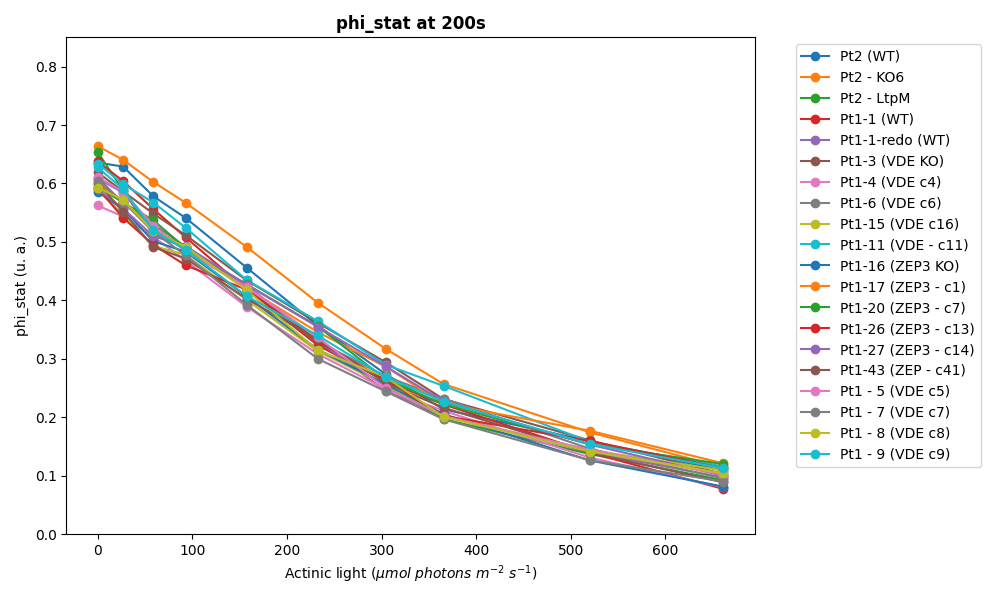

In [ ]:
time = 200
fig, ax = plt.subplots(figsize = (10, 6))

phi_0 = []

for condition in conditions:
    i = conditions.index(condition)
    phi_stat_matrix = np.asarray(results[i].phi_stat.tolist())
    phi_stat = phi_stat_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, phi_stat, 'o-', label = condition, color = f"C{i}")
    phi_0.append(phi_stat[0])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("phi_stat (u. a.)")
ax.set_ylim(0, 0.85)
ax.set_title(f"phi_stat at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/phi_stat_{time}s_all.png", dpi=300)

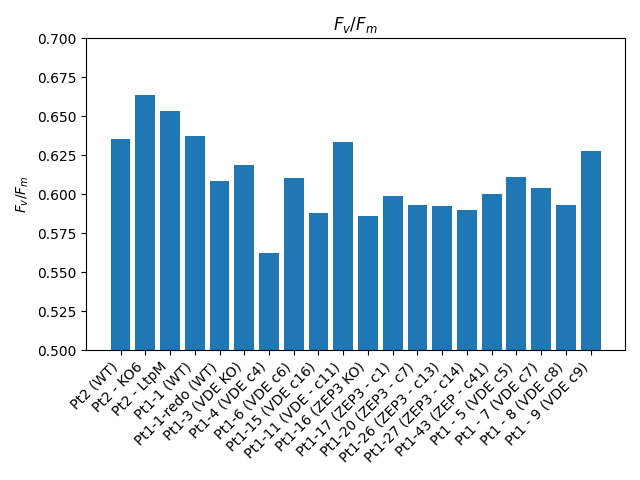

In [55]:
fig, ax = plt.subplots()

ax.bar(conditions_to_compare, phi_0)

# Set labels and title
ax.set_ylabel('$F_{v}/F_{m}$')
ax.set_title('$F_{v}/F_{m}$')

ax.set_ylim(0.5, 0.7)

# Rotate x-tick labels if needed
plt.xticks(rotation=45, ha='right')
fig.tight_layout()